In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\User\\jupyter-noutbooks\\08-Linear-Regression-Models\\Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

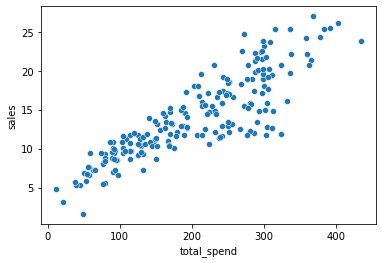

In [6]:
sns.scatterplot(data=df,x='total_spend',y='sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

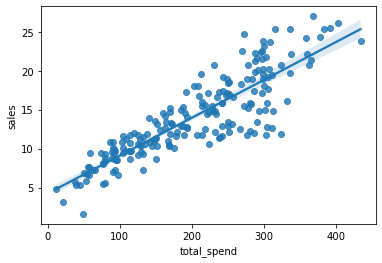

In [7]:
sns.regplot(data=df,x='total_spend',y='sales')

In [8]:
X = df['total_spend']
y = df['sales']

In [9]:
#help(np.polyfit)
# y = mx+b
# y = B_1x + B_0

In [10]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [11]:
potential_spend = np.linspace(0,500,100)

In [12]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

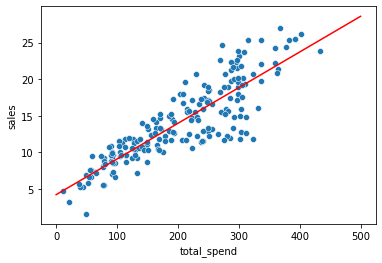

In [13]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(potential_spend,predicted_sales,color='red')

In [14]:
df = pd.read_csv('C:\\Users\\User\\jupyter-noutbooks\\08-Linear-Regression-Models\\Advertising.csv')

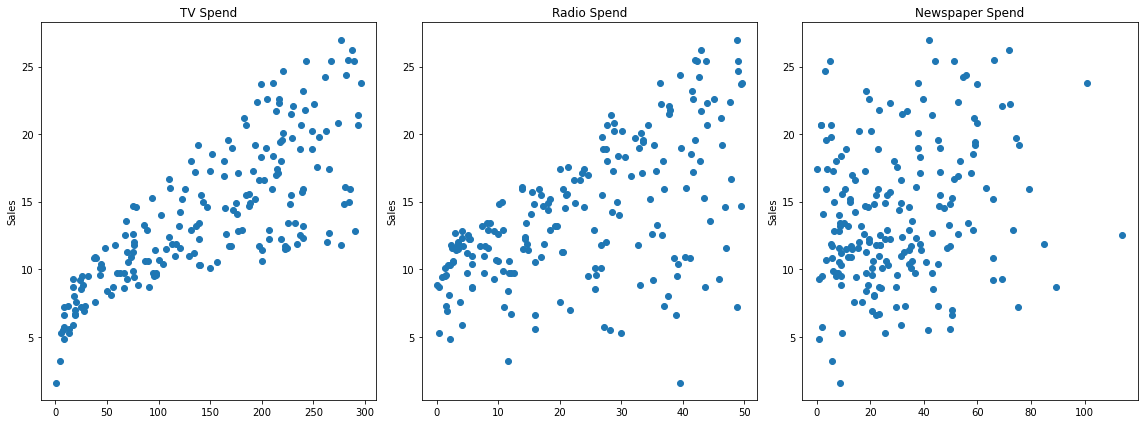

In [15]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [16]:
X = df.drop('sales',axis=1)

In [17]:
y = df['sales']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#help(LinearRegression)

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [24]:
test_predictions = model.predict(X_test) 

In [25]:
#y_test

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [27]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

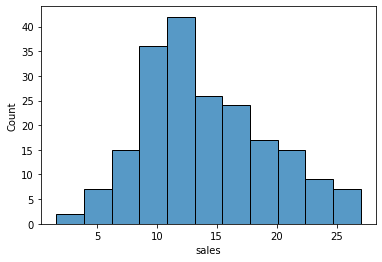

In [28]:
sns.histplot(data=df,x='sales')

In [29]:
mean_absolute_error(y_test,test_predictions)

1.5116692224549084

In [30]:
mean_squared_error(y_test,test_predictions)

3.79679723671522

In [31]:
# residuals = y - y^ (y_test - y_predictions)
test_residuals = y_test - test_predictions

In [32]:
test_residuals

95     0.334604
15     1.211772
30    -0.151071
158   -3.589238
128    2.497680
115   -0.755569
69     1.103075
170    1.049715
174   -1.775471
45    -0.224495
66     0.485570
182    2.174572
165   -2.402060
78    -3.670260
186    0.843204
177   -0.304544
56    -3.415494
152    0.443807
82     1.004171
68     0.175264
124   -0.068218
16    -1.274690
148   -1.596389
93     0.664982
65     1.691393
60     2.488020
84     0.782405
67     1.593723
125    1.519234
132   -2.814120
9     -1.576049
18     1.330806
55     1.969910
75    -4.077706
150   -2.001136
104    0.624092
135   -2.662026
137   -0.138265
164    1.060612
76     2.518094
79     1.486676
197    0.395137
38    -0.070454
24     1.609186
122   -1.563884
195    2.375645
29     1.211062
19     0.506693
143    1.709755
86     0.338802
114   -1.118484
173    0.068431
5     -6.153607
126   -4.553147
117    3.063632
73     1.238420
140    1.480429
98     1.144835
172   -0.095191
96    -0.453176
Name: sales, dtype: float64

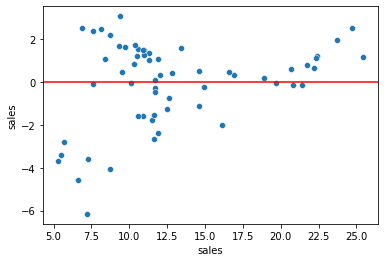

In [33]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')

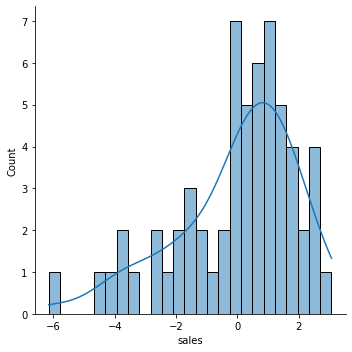

In [34]:
sns.displot(test_residuals,bins=25,kde=True)

In [35]:
import scipy as sp

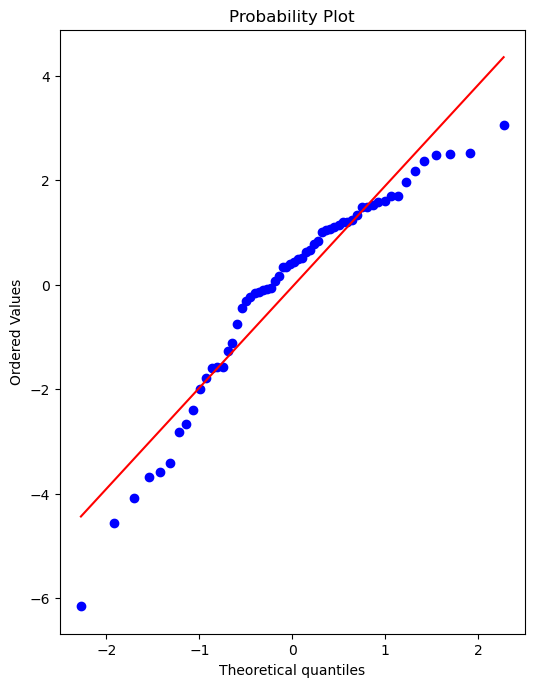

In [36]:
fig,ax = plt.subplots(figsize=(6,8),dpi=100)

_ = sp.stats.probplot(test_residuals,plot=ax)

In [37]:
final_model = LinearRegression()

In [38]:
final_model.fit(X,y)

LinearRegression()

In [39]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [40]:
y_pred = final_model.predict(X)

In [41]:
# turn model into .joblib file and share it
from joblib import dump,load

In [42]:
dump(final_model,'sales_model.joblib')

['sales_model.joblib']

In [43]:
loaded_model = load('sales_model.joblib')

In [44]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [45]:
X.shape

(200, 3)

In [46]:
# 149 Tv , 22 Radio , 12 Newspaper
# Find the sales

In [47]:
campaign =[[149,22,12]]

In [48]:
campaign

[[149, 22, 12]]

In [49]:
loaded_model.predict(campaign)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [50]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [51]:
X = df.drop('sales',axis=1)

In [52]:
y = df['sales']

In [53]:
# Polynomial Regression for high-order and interaction feauteres created

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [58]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [62]:
polynomial_converter.transform(X).shape

(200, 9)

In [64]:
X.shape

(200, 3)

In [66]:
poly_features = polynomial_converter.transform(X)

In [67]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [68]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [69]:
# a b c a**2 b**2 c**2 ab ac bc(9 columns)

In [70]:
poly_features = polynomial_converter.fit_transform(X)

In [71]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
model2 = LinearRegression()

In [76]:
model2.fit(X_train,y_train)

LinearRegression()

In [77]:
test_predictions2 = model2.predict(X_test)

In [78]:
model2.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [80]:
MAE = mean_absolute_error(y_test,test_predictions2)

In [81]:
MSE = mean_squared_error(y_test,test_predictions2)

In [82]:
RMS = np.sqrt(MSE)

In [83]:
MAE

0.5905974833808012

In [84]:
RMS

0.723321847385754

In [85]:
model2.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [86]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [88]:
 X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [89]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [90]:
# create different degree order of polynomial
# split poly_features train/test
# fit train
# store RMSE for both train and test set
# plot the results ( error vs degree order)
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_predictions))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [91]:
train_rmse_errors

[1.574596830590544,
 0.5950712355838924,
 0.46887581118220883,
 0.3694689701771597,
 0.24382207811380469,
 0.19671337047311022,
 0.42461444290813044,
 0.15843081769436082,
 0.16559288306589603]

In [92]:
test_rmse_errors

[1.9485372043446385,
 0.723321847385754,
 0.5392350985593082,
 1.3032266106293382,
 5.946507198306904,
 25.96499047924574,
 634.4704983493756,
 2697.7667366805845,
 132859.53269165484]

In [93]:
degrees = np.arange(1,5)

In [94]:
degrees

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

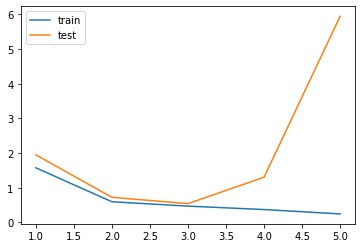

In [103]:
plt.plot(range(1,6),train_rmse_errors[:5],label='train')
plt.plot(range(1,6),test_rmse_errors[:5],label='test')
plt.legend()

In [104]:
model2.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [105]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [106]:
final_model = LinearRegression()

In [107]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [109]:
from joblib import dump,load

In [110]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [111]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']